#Download

In [ ]:
!wget "https://raw.githubusercontent.com/solalatus/IBS_GF_kepzes/main/Big_Data_and_ML/04Hyperparameters/clr.py?token=AHL2UDKITYK3K27TYW4F7XLBDIE2M" -O clr.py

--2021-08-09 15:40:12--  https://raw.githubusercontent.com/solalatus/IBS_GF_kepzes/main/Big_Data_and_ML/04Hyperparameters/clr.py?token=AHL2UDKITYK3K27TYW4F7XLBDIE2M
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23448 (23K) [text/plain]
Saving to: ‘clr.py’

clr.py              100%[===================>]  22.90K  --.-KB/s    in 0s      

2021-08-09 15:40:12 (68.4 MB/s) - ‘clr.py’ saved [23448/23448]



#Load

In [ ]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

#Modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
# Hyperparameters
learning_rate = 0.1 # The learning rate
momentum = 0.0

# create a model
def create_model():
      model = Sequential()
      # Input layer
      model.add(Dense(32, input_dim=image_vector_size, kernel_initializer='normal', activation='sigmoid'))
      # Output layer
      model.add(Dense(10, activation='softmax'))

      # Compile a model
      model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate, momentum), metrics=['accuracy'])
      return model
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
results = model.fit(
 x_train, y_train,
 epochs= 15,
 batch_size = 128,
 validation_data = (x_test, y_test),
 verbose = 1 # We need 0, because Colab does not like if we print 1000 lines. So we disable keras status prints
)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 1.0762 - accuracy: 0.7029 - val_loss: 0.6866 - val_accuracy: 0.8139
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.6576 - accuracy: 0.8147 - val_loss: 0.5508 - val_accuracy: 0.8379
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5734 - accuracy: 0.8295 - val_loss: 0.5662 - val_accuracy: 0.8257
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5503 - accuracy: 0.8343 - val_loss: 0.5343 - val_accuracy: 0.8376
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5537 - accuracy: 0.8338 - val_loss: 0.5726 - val_accuracy: 0.8218
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5310 - accuracy: 0.8392 - val_loss: 0.4700 - val_accuracy: 0.8586
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5108 - accuracy: 0.8431 - val_loss: 0.5088 - val_accuracy: 0.8513
Epoch 

In [ ]:
results.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'down right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Maximum Loss : 1.0762

Minimum Loss : 0.4540

Loss difference : 0.6221


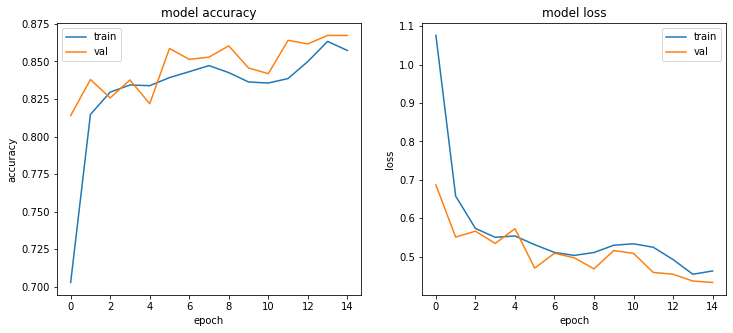

In [ ]:
# summarize history for accuracy
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='down right')

# summarize history for loss
plt.subplot(122)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

#LR Scheduler

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
#history = model.fit(train_scaled, y_train, epochs=10, callbacks=[callback], verbose=1)

history = model.fit(
          x_train, y_train,
          epochs= 15,
          batch_size = 100,
          validation_data = (x_test, y_test),
          verbose = 1, # We need this, because Colab does not like if we print 1000 lines. So we disable keras status prints
          callbacks = callback
          )

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 0.4902 - accuracy: 0.8513 - val_loss: 0.4315 - val_accuracy: 0.8718
Epoch 2/15
600/600 [==============================] - 2s 3ms/step - loss: 0.4709 - accuracy: 0.8590 - val_loss: 0.4854 - val_accuracy: 0.8562
Epoch 3/15
600/600 [==============================] - 2s 3ms/step - loss: 0.4987 - accuracy: 0.8467 - val_loss: 0.5045 - val_accuracy: 0.8450
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 0.4992 - accuracy: 0.8490 - val_loss: 0.4724 - val_accuracy: 0.8614
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 0.4686 - accuracy: 0.8581 - val_loss: 0.4455 - val_accuracy: 0.8694
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 0.4972 - accuracy: 0.8430 - val_loss: 0.4671 - val_accuracy: 0.8564
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 0.4462 - accuracy: 0.8621 - val_loss: 0.4535 - val_accuracy: 0.8613
Epoch 

In [ ]:
scheduled_lr = round(model.optimizer.lr.numpy(), 5)
round(model.optimizer.lr.numpy(), 5)

0.06065

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'down right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Maximum Loss : 0.4992

Minimum Loss : 0.4071

Loss difference : 0.0921


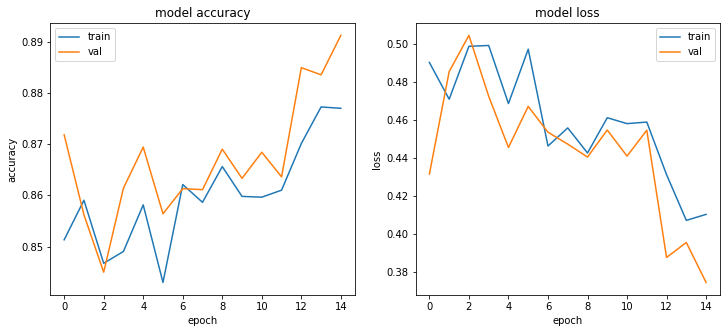

In [ ]:
# summarize history for accuracy
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='down right')

# summarize history for loss
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

max_loss = np.max(history.history['loss'])
min_loss = np.min(history.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

# LRFinder

In [ ]:
import os
import numpy as np
import warnings

from tensorflow.keras.callbacks import Callback
from keras import backend as K

In [ ]:
from clr import LRFinder

num_samples = 10000
batch_size = 128
minimum_lr = 1e-5
maximum_lr = 10

lr_callback = LRFinder(num_samples, batch_size,
                       minimum_lr, maximum_lr,
                       validation_data=(x_test, y_test),
                       lr_scale='exp')

In [ ]:
results = model.fit(
 x_train, y_train,
 epochs= 15,
 batch_size = 128,
 validation_data = (x_test, y_test),
 verbose = 1 # We need this, because Colab does not like if we print 1000 lines. So we disable keras status prints
)

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 1.0916 - accuracy: 0.7140 - val_loss: 0.7105 - val_accuracy: 0.7938
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.6844 - accuracy: 0.8004 - val_loss: 0.5728 - val_accuracy: 0.8436
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5875 - accuracy: 0.8259 - val_loss: 0.6551 - val_accuracy: 0.7873
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5792 - accuracy: 0.8249 - val_loss: 0.5557 - val_accuracy: 0.8368
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5472 - accuracy: 0.8354 - val_loss: 0.5364 - val_accuracy: 0.8377
Epoch 6/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5332 - accuracy: 0.8395 - val_loss: 0.4997 - val_accuracy: 0.8511
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.5201 - accuracy: 0.8416 - val_loss: 0.5017 - val_accuracy: 0.8484
Epoch 

In [ ]:
# Ensure that number of epochs = 1 when calling fit()
model.fit(x_train, y_train, epochs=1, batch_size=batch_size, callbacks=[lr_callback])

469/469 [==============================] - 31s 66ms/step - loss: 0.4127 - accuracy: 0.8709


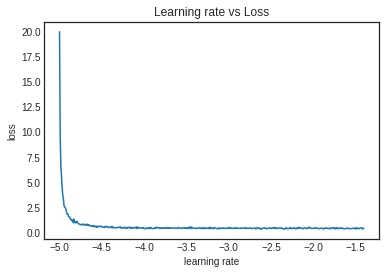

In [ ]:
lr_callback.plot_schedule()

In [ ]:
model.optimizer.lr.numpy()

0.04009339

In [ ]:
#Set the maximum of LR
max_lr = model.optimizer.lr.numpy()

#One Cycle LR

In [ ]:
from clr import OneCycleLR

In [ ]:
num_samples = 1000
batch_size = 128

lr_manager = OneCycleLR(num_samples=num_samples,
                        batch_size=batch_size,
                        max_lr=max_lr,
                        end_percentage=0.1,)

In [ ]:
model.fit(x_train, y_train, epochs=1, batch_size=batch_size, callbacks=[lr_manager])

469/469 [==============================] - 2s 3ms/step - loss: 1.2537 - accuracy: 0.6773
 - lr: 0.00012 - momentum: 0.95 


LR Range :  0.00012454542 0.04009339
Momentum Range :  0.85 0.95


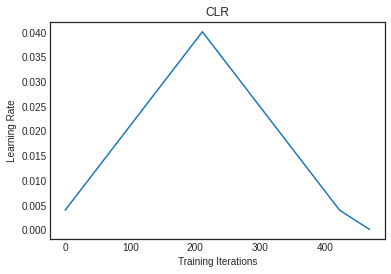

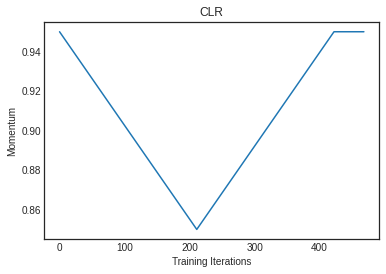

In [ ]:
print("LR Range : ", min(lr_manager.history['lr']), max(lr_manager.history['lr']))
print("Momentum Range : ", min(lr_manager.history['momentum']), max(lr_manager.history['momentum']))


plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("CLR")
plt.plot(lr_manager.history['lr'])
plt.show()

plt.xlabel('Training Iterations')
plt.ylabel('Momentum')
plt.title("CLR")
plt.plot(lr_manager.history['momentum'])
plt.show()